# Cancer Classification Model

## **Artificial Neural Network**

## **DataSet** - CSV file which contains all the perimeters of cell.

## **Objective** - To classify if the cell is Benign(non cancerous) or Malignant(cancerous)


Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Exploratory data Analysis**

In [ ]:
df = pd.read_csv('cancer_classification.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

[]

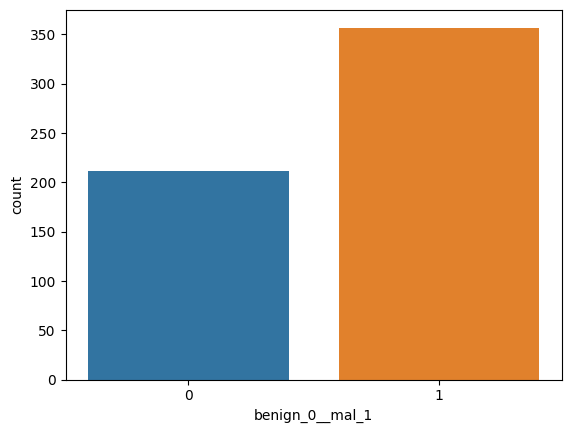

In [ ]:
sns.countplot(x="benign_0__mal_1", data = df).plot()

In [ ]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind = 'bar')

<Axes: >

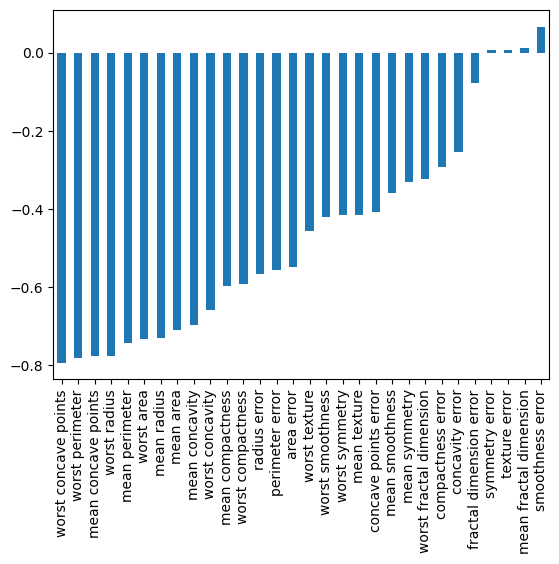

In [ ]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind = 'bar') # grabbing all excenpt last column i.e benign_mal..

<Axes: >

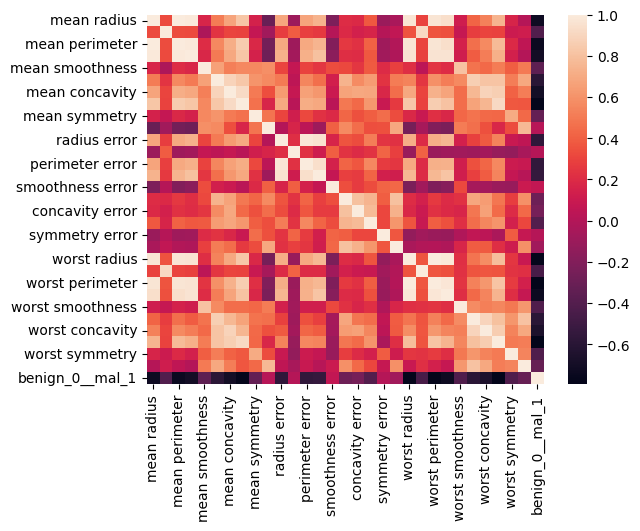

In [ ]:
sns.heatmap(df.corr())

## **Train Test Split Using Sci-KitLearn's train_test_split class**


In [ ]:
X = df.drop('benign_0__mal_1', axis  =1).values
y = df['benign_0__mal_1'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

## **Scaling Using Sci-KitLearn's MinMaxScaler Class**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler =  MinMaxScaler()

In [ ]:
X_train  = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
X_train.shape

(426, 30)

## **Creating Sequential Model Using Tensorflow Library**

In [ ]:
model  = Sequential()

model.add(Dense(30, activation  ='relu'))

model.add(Dense(15, activation  ='relu'))

# For Binary Classification use Sigmoid function
model.add(Dense(1, activation  ='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

## **Training The Model**

In [ ]:
model.fit(x=X_train, y = y_train, epochs = 600, validation_data=(X_test, y_test))

Epoch 1/600
14/14 [==============================] - 2s 27ms/step - loss: 0.6926 - val_loss: 0.6843
Epoch 2/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6640 - val_loss: 0.6553
Epoch 3/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6286 - val_loss: 0.6097
Epoch 4/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5851 - val_loss: 0.5650
Epoch 5/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5418 - val_loss: 0.5212
Epoch 6/600
14/14 [==============================] - 0s 7ms/step - loss: 0.4982 - val_loss: 0.4744
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4499 - val_loss: 0.4254
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4035 - val_loss: 0.3755
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3581 - val_loss: 0.3309
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3206 - val_loss: 0.2912
Epoch 11

## **Loss Evaluation**
It shows that validation loss decreased but after a point it kept on increasing even though loss is always decreasing.
\
By Observation ***Early Stopping*** would be beneficial

<Axes: >

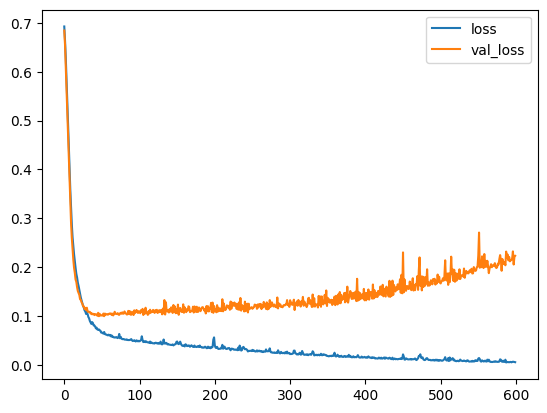

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

## **Creating and Training Model USing Early Stopping callback.**

In [ ]:
model  = Sequential()

model.add(Dense(30, activation  ='relu'))

model.add(Dense(15, activation  ='relu'))

# For Binary Classification use Sigmoid function
model.add(Dense(1, activation  ='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
help(EarlyStopping)

In [ ]:
early_stop  =  EarlyStopping(monitor= 'val_loss', mode= 'min', verbose  =1, patience = 25)

In [ ]:
model.fit(x=X_train, y = y_train, epochs = 600, validation_data=(X_test, y_test),
          callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 1s 14ms/step - loss: 0.6833 - val_loss: 0.6651
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6457 - val_loss: 0.6321
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6106 - val_loss: 0.5953
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5705 - val_loss: 0.5476
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5228 - val_loss: 0.4963
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4738 - val_loss: 0.4451
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4253 - val_loss: 0.3954
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3802 - val_loss: 0.3483
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3456 - val_loss: 0.3123
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3040 - val_loss: 0.2810
Epoch 11

<Axes: >

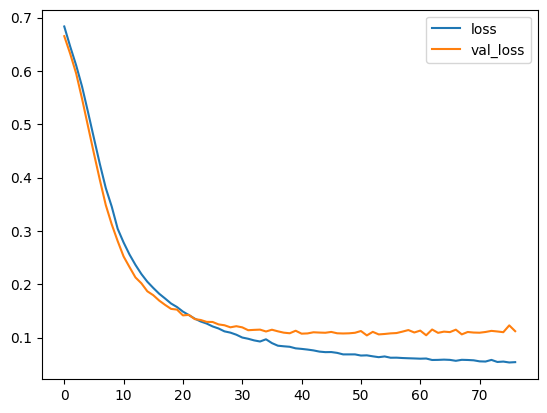

In [ ]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

### **Using Dropout layer to prevent overfitting.**

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
model  = Sequential()

model.add(Dense(30, activation  ='relu'))
model.add(Dropout(0.5))

model.add(Dense(15, activation  ='relu'))
model.add(Dropout(0.5))

# For Binary Classification use Sigmoid function
model.add(Dense(1, activation  ='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
model.fit(x=X_train, y = y_train, epochs = 600, validation_data=(X_test, y_test),
          callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 2s 21ms/step - loss: 0.7667 - val_loss: 0.7209
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.7152 - val_loss: 0.6812
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6838 - val_loss: 0.6607
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6739 - val_loss: 0.6445
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6582 - val_loss: 0.6273
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6402 - val_loss: 0.6108
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6275 - val_loss: 0.5912
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6008 - val_loss: 0.5635
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5745 - val_loss: 0.5332
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5621 - val_loss: 0.5039
Epoch 11

<Axes: >

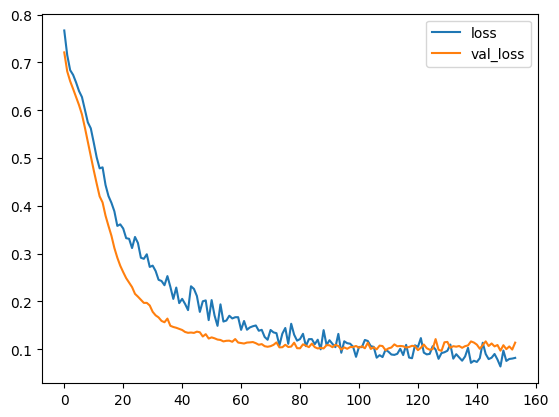

In [ ]:
loss = pd.DataFrame(model.history.history)
loss.plot()

Now val loss and loss looks closer than before.:

## **Model Evaluation**

In [ ]:
predictions = (model.predict(X_test) > 0.5).astype("int32")
predictions

5/5 [==============================] - 0s 4ms/step


array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [ ]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 3 85]]
